In [17]:
# ========== ----- ========== Import Libraries ========== ----- ========== #

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# ========== ----- ========== End ========== ----- ========== #

In [18]:
# ========== ----- ========== Import Dataset ========== ----- ========== #

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_df.csv')

# get the number of rows and columns
num_rows, num_cols = df.shape

print('Number of Rows: ', num_rows)
print('Number of Columns: ', num_cols, "\n")

# Display the first few rows of the DataFrame
print(df.head())

# ========== ----- ========== End ========== ----- ========== #

Number of Rows:  135493
Number of Columns:  50 

   client_catg  avg_elec_reading_remarque  avg_elec_consommation_level_1  \
0           11                   6.971429                     352.400000   
1           11                   7.216216                     557.540541   
2           11                   7.055556                     798.611111   
3           11                   6.150000                       1.200000   
4           11                   8.857143                     663.714286   

   avg_elec_consommation_level_2  avg_elec_consommation_level_3  \
0                      10.571429                       0.000000   
1                       0.000000                       0.000000   
2                      37.888889                       0.000000   
3                       0.000000                       0.000000   
4                     104.857143                     117.357143   

   avg_elec_consommation_level_4  avg_elec_months_number  \
0                       0.00000

0    127927
1      7566
Name: target, dtype: int64


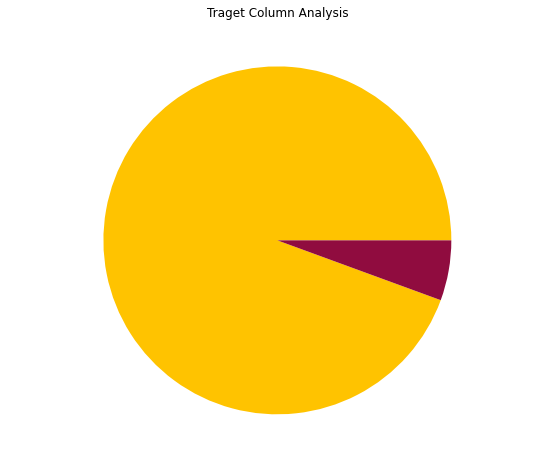

In [19]:
# ========== ----- ========== Traget Column Analysis ========== ----- ========== #

# get the values of Target and their counts
target_counts = df['target'].value_counts()
print(target_counts)

# Create a pie chart
custom_colors = ['#FFC300', '#900C3F']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(target_counts, labels=["Unfraud", "Fraud"],
       colors=custom_colors, labeldistance=1.2, textprops={'color': 'white', 'fontsize': 16})
# Add a title
plt.title('Traget Column Analysis')
# Show the chart
plt.show()

# ========== ----- ========== End ========== ----- ========== #


In [22]:
# ========== ----- ========== Logistic Regression Model ========== ----- ========== #

# Split the data into training and testing sets
# Select all columns except the target field
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

# Train a logistic regression model on the training set
lr = LogisticRegression(max_iter=1000, C=0.1)
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set: {:.2f}%".format(accuracy * 100))
print(confusion_matrix(y_test, y_pred))

# ========== ----- ========== End ========== ----- ========== #


Accuracy on testing set: 94.20%
[[25522    29]
 [ 1542     6]]


c:\Users\CMP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
